 To get started with our project and the exploratory analysis we first imported different libraries, that are fundamental to create our environment and will help with different steps such us visualize the dataset and fitting and performing the clustering models we are going to use.

In [43]:
# AI and ML - group project

# Importing libraries
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Than we imported the dataset and read the data.

In [44]:

# Importing the dataset
# IMPORTING DATASET
df = pd.read_csv(r'C:/Users/eleon/Desktop/ai.project/customer_segmentation.csv')
print(df)

                               order_id                       customer_id  \
0      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1      86674ccaee19790309333210917b2c7d  1b338293f35549b5e480b9a3d7bbf3cd   
2      aee682982e18eb4714ce9f97b15af5e2  8858442ea4d5dc5bb9e118e8f728095d   
3      d543201a9b42a1402ff97e65b439a48b  971bf8f42a9f8cb3ead257854905b454   
4      d543201a9b42a1402ff97e65b439a48b  971bf8f42a9f8cb3ead257854905b454   
...                                 ...                               ...   
13796  493ba21a937e956c5e0e4e26c9f1b7f9  408d74d06be5d5140bb933f248de1342   
13797  4a7cf245701068d38d441791b735e4bd  1d3b24ba06f2e3fa4bfa74fd70d2310f   
13798  33f8dfc5a51063c31d7b12e9d43a45fc  8f7f4871646eb2fa410cc2d50b861317   
13799  442a41b00a8a8bda35511fdf1eb65cc5  e42e2e8642f9c09100b6667e321c2811   
13800  73d60420cd1a179b2d8887d538efe4c2  65d9213dfa004c17dc126503e106e4a3   

      order_status order_purchase_timestamp    order_approved_at  \
0      

TO TAKE AN OVERVIEW OF THE DATA WE USED THE FOLLOWING FUNCTIONS:
df.head() ,df.info() ,df.describe() ,df.shape
EACH OF THEM TELLS US A DIFFERENT INFORMATION:
 -df.head() allows us take a look at what the data looks like , and from the output we can suppose that this data comes from an e-commerce shop since we have order id, status time ecc...
 -df.info() method is useful to get a quick description of the data, in particular the
total number of rows, each attribute’s type, and the number of non-null values .From this output we can notice that date and time are considered objects , later we will have to fix this because it's important that the computer reads the data set in a correct way, and also that there aren't any missing  features.
 -df.describe() gives us some basic statistical details
 -df.shape gives us  the shape of our DataFrame.So from the output we know we are dealing with 26 colums and 13801 rows

In [45]:
# Taking a look at the data structure
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,belo horizonte,SP,perfumaria,29,178,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,belo horizonte,SP,perfumaria,29,178,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,belo horizonte,SP,perfumaria,29,178,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       13801 non-null  object 
 1   customer_id                    13801 non-null  object 
 2   order_status                   13801 non-null  object 
 3   order_purchase_timestamp       13801 non-null  object 
 4   order_approved_at              13801 non-null  object 
 5   order_delivered_carrier_date   13801 non-null  object 
 6   order_delivered_customer_date  13801 non-null  object 
 7   order_estimated_delivery_date  13801 non-null  object 
 8   payment_type                   13801 non-null  object 
 9   payment_installments           13801 non-null  int64  
 10  payment_value                  13801 non-null  float64
 11  customer_unique_id             13801 non-null  object 
 12  customer_city                  13801 non-null 

In [47]:
df.describe()

,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght
count,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000
mean,3.014637,194.349691,1.230491,130.947103,21.938168,49.300703,814.330411
std,2.801721,294.854258,0.737495,210.712421,18.567013,9.759529,648.790194
min,1.000000,0.050000,1.000000,0.850000,0.000000,8.000000,4.000000
25%,1.000000,66.750000,1.000000,40.000000,12.870000,43.000000,366.000000
50%,2.000000,120.290000,1.000000,79.000000,18.230000,52.000000,631.000000
75%,4.000000,206.780000,1.000000,139.000000,23.310000,57.000000,1030.000000
max,20.000000,7274.880000,13.000000,4590.000000,375.280000,69.000000,3985.000000


In [48]:
df.shape

(13801, 26)

As previously stated we are going to fix the way in which our dataset is read, so we converted the date and the time variable that were considered objects, in order for the computer to read them as dates and then we separated the variale in time and date. This was a very important step since we need this variable in the next steps in order to compute recency in the rfm model.

In [49]:

# Fixing the date
datelist = ['order_purchase_timestamp', 'order_approved_at', 'order_approved_at', 'order_delivered_carrier_date',
            'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

# Converting the list of date variables to a pandas datetime object
for c in datelist:
    df[c] = pd.to_datetime(df[c])

# Separating the date and time in the order column they might be interesting variables for the analysis
df['order_date'] = [d.date() for d in df['order_purchase_timestamp']]
df['order_time'] = [d.time() for d in df['order_purchase_timestamp']]

To continue with data cleaning and fixing we proceed by removing duplicates 

In [50]:
# Data preparation

# Removing duplicates and resetting the index of the dataframe
df.duplicated().sum()
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)


We supposed that there weren't missing values when we looked with df.info and here we get the confirmation 

In [51]:
# Checking for missing values
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_city                      0
seller_state                     0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_category_name_english    0
order_date                       0
order_time                       0
dtype: int64

Since clustering is sensitive to outliers and in our opinion for customer segmentation it's important to know more about payment value and payment installment ,we check for outliers that can confuse our models and than we proceede to remove them if they are present. 
From the scatterplot we can instantly and easily see that there are some outliers (for example the point above 7000 in payment value ) but in order not to rely only on the field of view, we calculate the mean and the std to see more precisly how far these outliers really are.

<AxesSubplot:xlabel='index', ylabel='payment_value'>

<Figure size 432x288 with 0 Axes>

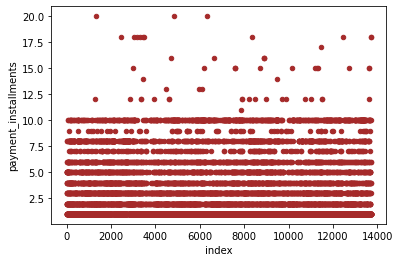

<Figure size 432x288 with 0 Axes>

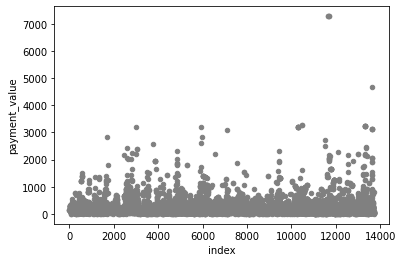

In [52]:
# Checking for outliers
plt.figure()
df.reset_index().plot(kind='scatter', x='index',
                      y='payment_installments', c='brown')
plt.figure()
df.reset_index().plot(kind='scatter', x='index', y='payment_value', c='gray')

In [53]:

# Checking the mean and standar deviation of the payment value (to check how far is the outlier observed in the scatterplot)
mean_pv = df["payment_value"].mean()  # mean of 195.2
std_pv = df["payment_value"].std()  # std of 295.5

Using the value found above we now print out the number of outliers ,that turns out to be 5. We can easily remove them using drop.

In [54]:
# Seeing how many outliers there are, the output prints 5 payments higher than 4000
# Value of 4000 decided by looking at the scatterplot
outlier1 = df[df['payment_value'] > 4000]
print('\nOutlier dataframe:\n', outlier1)


Outlier dataframe:
                                order_id                       customer_id  \
11673  736e1922ae60d0d6a89247b851902527  ec5b2ba62e574342386871631fafd3fc   
11674  736e1922ae60d0d6a89247b851902527  ec5b2ba62e574342386871631fafd3fc   
11675  736e1922ae60d0d6a89247b851902527  ec5b2ba62e574342386871631fafd3fc   
11676  736e1922ae60d0d6a89247b851902527  ec5b2ba62e574342386871631fafd3fc   
13638  8dbc85d1447242f3b127dda390d56e19  3d979689f636322c62418b6346b1c6d2   

      order_status order_purchase_timestamp   order_approved_at  \
11673    delivered      2018-07-15 14:49:44 2018-07-17 04:31:36   
11674    delivered      2018-07-15 14:49:44 2018-07-17 04:31:36   
11675    delivered      2018-07-15 14:49:44 2018-07-17 04:31:36   
11676    delivered      2018-07-15 14:49:44 2018-07-17 04:31:36   
13638    delivered      2018-06-22 12:23:19 2018-06-22 12:36:36   

      order_delivered_carrier_date order_delivered_customer_date  \
11673          2018-07-20 13:09:00           

In [55]:
# Deleting 5 outliers out of 13718 other orders and resetting the index again
df = df.drop(df[df.payment_value > 4000].index)
df = df.reset_index(drop=True)

To continue with our visualization we plot the scatterplots of variables that as alredy mentiond are very significant to us , after printing the output we can compare these figures with the previous one that contained outliers and see the changes !!

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

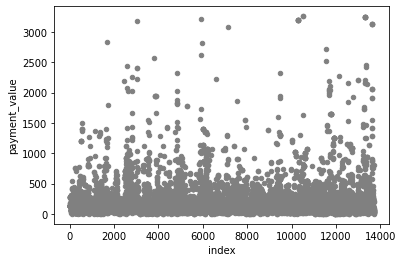

<Figure size 432x288 with 0 Axes>

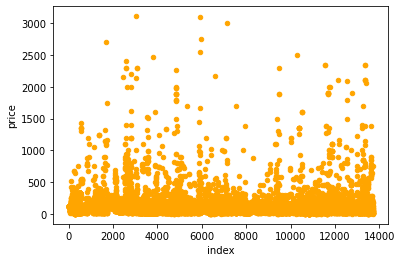

<Figure size 432x288 with 0 Axes>

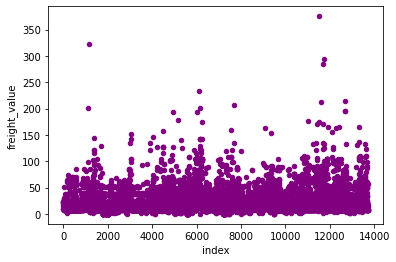

<Figure size 432x288 with 0 Axes>

In [56]:
# Continuing to look at other variables by plotting scatterplots
plt.figure()
df.reset_index().plot(kind='scatter', x='index', y='payment_value',
                      c='gray')  # re-plotting after removing outliers
plt.figure()
df.reset_index().plot(kind='scatter', x='index', y='price', c='orange')
plt.figure()
df.reset_index().plot(kind='scatter', x='index', y='freight_value', c='purple')
plt.figure()

Now we start looking for Correlations:
Since the dataset is not too large, we can compute the correlation between every pair of attributes using the corr()
method , and helping ourself with an heatmap that facilitates the understanding .The correlation coefficient ranges from –1 to 1. When it's close to 1, it means that there is a strong positive correlation while when the coefficient is close to –1, it means that there is a strong negative correlation . From the output we can notice how some variables influence each other ; for example price and paymentvalue are strictly correlated while order item id and price are not .

<Figure size 432x288 with 0 Axes>

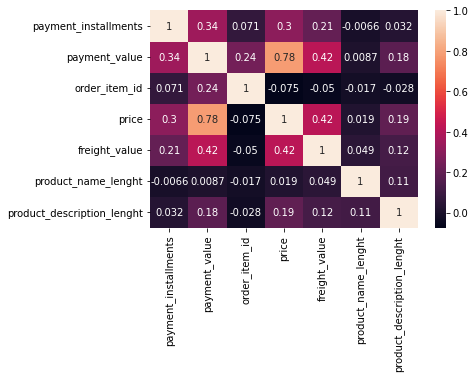

<Figure size 432x288 with 0 Axes>

In [57]:

# Creating a correlation matrix heatmap to look at the relation between variables
sns.heatmap(df.corr(), annot=True)
plt.figure()

Since this is a costumer segmentation task we tought that analysing where most customers are from was an important insight  .
From the plots we can easily state that there are more customers in capital cities of the different States (ex Sãn Paulo, Rio de Janeiro, )


Text(0, 0.5, 'Number of Customers')

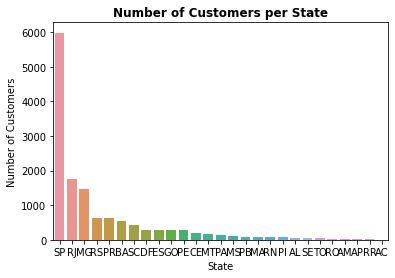

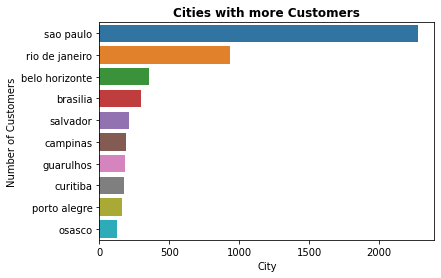

In [58]:
# Counting customers per city and per state and creating dataframes with the purpose of plotting a graph
customerstate = df.groupby('customer_state').count()[
    'customer_id'].reset_index()
customercity = df.groupby('customer_city').count()['customer_id'].reset_index()

# Graph of numer of customers in each state
plt.figure()
sns.barplot(data=customerstate.sort_values('customer_id',
            ascending=False), x='customer_state', y='customer_id')
plt.title('Number of Customers per State', fontweight='bold')
plt.xlabel('State')
plt.ylabel('Number of Customers')

# Graph of top 10 cities with most customers
plt.figure()
sns.barplot(data=customercity.sort_values('customer_id', ascending=False).nlargest(
    10, 'customer_id'), x='customer_id', y='customer_city')
plt.title('Cities with more Customers', fontweight='bold')
plt.xlabel('City')
plt.ylabel('Number of Customers')

To continue our analysis we grouped similar categories we found in the data set. This will be useful  for the plots but also later on when we proceed with features engeneering (encoding) .
We decided to arbitrarly assign certain products to different categories following a simple logical criterion(ex for all the products related to fashion and beauty we created a category named fashion_beauty).Than we plotted an insigth that can be very intresting for the Company to have : which are the most ordered categories of products and which are the least ordered ones ?


In [59]:
# Grouping similar categories of product category names in case we use this variable in future analysis (encoding becomes easier, there would be less dummies)
df['product_category_name_english'] = df['product_category_name_english'].replace(['art', 'arts_and_craftmanship', 'sports_leisure',
                                                                                   'garden_tools', 'flowers', 'music', 'musical_instruments',
                                                                                   'books_general_interest', 'books_imported', 'books_technical'], 'hobbies')
df['product_category_name_english'] = df['product_category_name_english'].replace(['air_conditioning', 'bed_bath_table', 'furniture_bedroom',
                                                                                   'furniture_decor', 'furniture_living_room', 'home_appliances',
                                                                                   'home_appliances_2', 'home_comfort_2', 'home_confort',
                                                                                   'home_construction', 'housewares', 'kitchen_dining_laundry_garden_furniture',
                                                                                   'small_appliances', 'small_appliances_home_oven_and_coffee', 'office_furniture',
                                                                                   'signaling_and_security', 'stationery', 'luggage_accessories'], 'home_products')
df['product_category_name_english'] = df['product_category_name_english'].replace(
    ['drinks', 'food', 'food_drink'], 'food_drink')
df['product_category_name_english'] = df['product_category_name_english'].replace(['construction_tools_construction', 'construction_tools_lights',
                                                                                   'construction_tools_safety', 'costruction_tools_garden',
                                                                                   'costruction_tools_tools'], 'construction_tools')
df['product_category_name_english'] = df['product_category_name_english'].replace(['audio', 'auto', 'cds_dvds_musicals', 'cine_photo', 'computers',
                                                                                   'computers_accessories', 'consoles_games', 'dvds_blu_ray', 'electronics',
                                                                                   'fixed_telephony', 'telephony', 'tablets_printing_image'], 'electronic_gadgets')
df['product_category_name_english'] = df['product_category_name_english'].replace(['fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing',
                                                                                   'fashion_shoes', 'fashion_underwear_beach', 'health_beauty', 'perfumery'], 'fashion_beauty')
df['product_category_name_english'] = df['product_category_name_english'].replace(['baby', 'diapers_and_hygiene', 'toys', 'party_supplies', 'pet_shop',
                                                                                   'christmas_supplies', 'cool_stuff', 'watches_gifts'], 'family_festivities')
df['product_category_name_english'] = df['product_category_name_english'].replace(
    ['industry_commerce_and_business', 'market_place'], 'sellers')



Text(0, 0.5, 'Product Category')

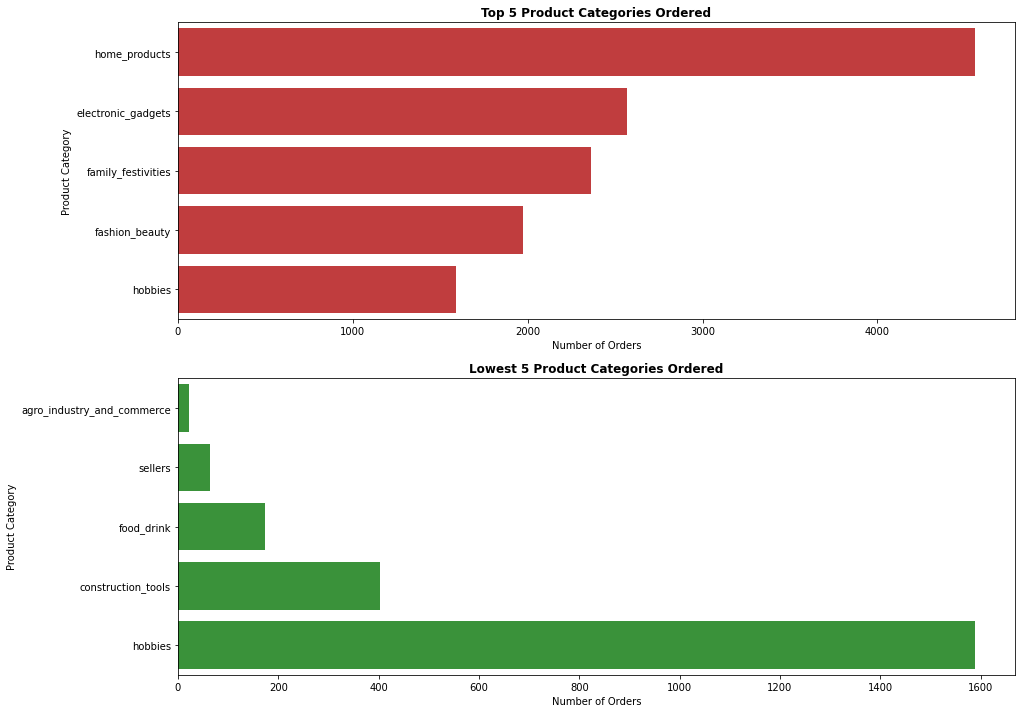

In [60]:
# Counting the product categories to check which one is most and less ordered
best_seller_p = df['product_category_name_english'].value_counts(
).reset_index().nlargest(5, 'product_category_name_english')
worst_seller_p = df['product_category_name_english'].value_counts(
).reset_index().nsmallest(5, 'product_category_name_english')

# Graphs aesthetic
plt.figure(figsize=(15, 12))
green_color = sns.color_palette()[3]
red_color = sns.color_palette()[2]

# Graph of top 10 most ordered products
plt.subplot(211)
sns.barplot(data=best_seller_p, x='product_category_name_english',
            y='index', color=green_color)
plt.title('Top 5 Product Categories Ordered', fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')

# Graph of top 10 less ordered products
plt.subplot(212)
sns.barplot(data=worst_seller_p, x='product_category_name_english',
            y='index', color=red_color)
plt.title('Lowest 5 Product Categories Ordered', fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')

The last but still very intresting insight we decided to get a look at, are orders by payment type and orders with the number of payment installments.By looking at the plot on the left we can see that the majority of the customers is paying with a credit card; this fact can work as a confermation of our first assumption because it wouldn't be unusual to pay with a credit card in an e-commerce .From the plot on the rigth instead we can see that most of our costumers pay their order in one time (not using installments)

Text(0, 0.5, 'Count of Orders')

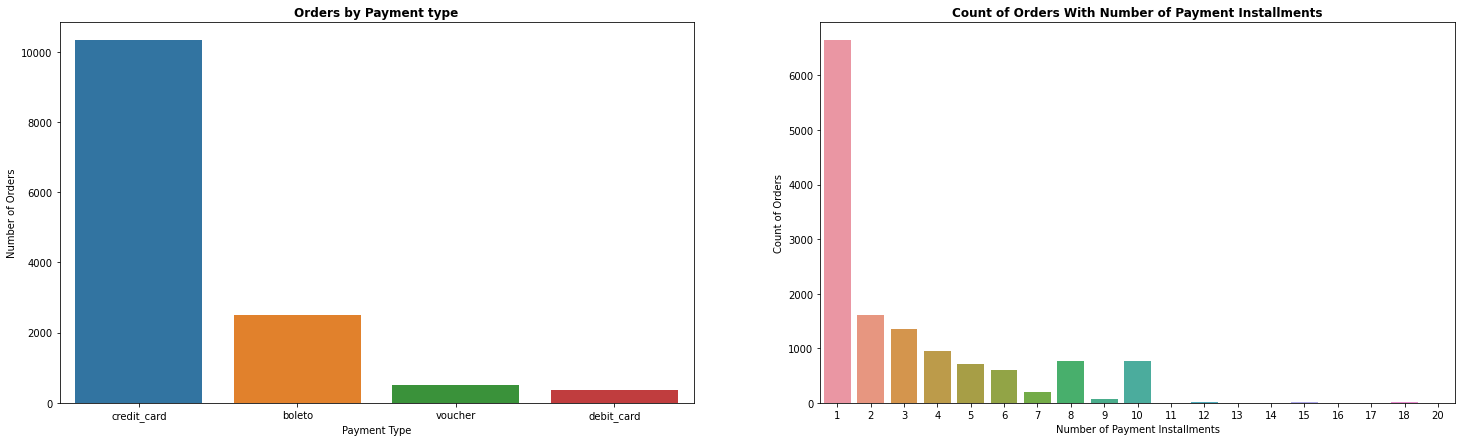

In [61]:

# Counting different payment types to plot which ones are more used
payments_types = df['payment_type'].value_counts().reset_index()

plt.figure(figsize=(25, 7))

# Graph of number of orders per payment type
plt.subplot(121)
sns.barplot(data=payments_types, x='index', y='payment_type')
plt.title('Orders by Payment type', fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')

# Graph of number of orders per number of payment installments
plt.subplot(122)
sns.barplot(data=df['payment_installments'].value_counts(
).reset_index(), x='index', y='payment_installments')
plt.title('Count of Orders With Number of Payment Installments', fontweight='bold')
plt.xlabel('Number of Payment Installments')
plt.ylabel('Count of Orders')

After all these interesting insigths we proceeded with the encoding

In [62]:
# Encoding variables
df = pd.get_dummies(df, prefix=['customer_state: '], columns=[
                    'customer_state'], drop_first=True)
df = pd.get_dummies(df, prefix=['payment_type: '], columns=[
                    'payment_type'], drop_first=True)
df = pd.get_dummies(df, prefix=['seller_state: '], columns=[
                    'seller_state'], drop_first=True)
df = pd.get_dummies(df, prefix=['product_category_name: '], columns=[
                    'product_category_name_english'], drop_first=True)

The department store asked us to develop our strategies around the RFM analysis that stands for Recency, Frequency and Monetary value. These RFM metrics are important indicators of a customer’s behavior and since we want to segment them based on these behaviors we proceede by calculating :
- How recently a customer has transacted with a brand.
- How frequently they’ve engaged with a brand.
- How much money they’ve spent on a brand’s products and services. 



In [63]:
# Calculating the RFM

# Recency = time since a customer's last purchase
# Calculating each purchasing time stamp minus the most recent purchase timestamp (max)
df['recency'] = max(df['order_purchase_timestamp']) - \
    df['order_purchase_timestamp']
# Getting the minimum recency value for each customer (customer with multiple purchases ended up with multiple recencies, therefore calculating the most recent purchase)
df['recency'] = df.groupby(['customer_unique_id'], as_index=False)[
    'recency'].transform('min')
# Keeping only the days in the column, leaving out the time
df['recency'] = df['recency'].dt.days

# Frequency = how many times has a customer made a purchase
# Counting purchases per customer unique id and adding values to a new column in the dataset
df['frequency'] = df.groupby(['customer_unique_id'], as_index=False)[
    'order_id'].transform('count')

# Monetary = total amount a customer has spend purchasing products
# Calculating it by summing all the payment values a customer has spent
df['monetary'] = df.groupby(['customer_unique_id'], as_index=False)[
    'payment_value'].transform('sum')

After calculating these values we can alredy start to make some distinctions among customers, so for every single metric we decided to assign to each costumer a score ranging from 1 to 5. The criterion we used to assign the scores is based on the calculation of the max, min,std and mean. We then stored the results in the dataframe (df) to be able to use these colums for future analysis .

In [64]:
# Creating an empty column to calculate recency score
df['recency_score'] = ''

# For function that inputs the score in the empty column based on the conditions set
# The numbers were chosen based of the recency mean, std, max and min + our reasoning considered aspects like "how many months could we consider the customer inactive?"
print('recency mean: ', df['recency'].mean())
print('recency std: ', df['recency'].std())
print('recency max: ', df['recency'].max())
print('recency min: ', df['recency'].min())

for i in df.index:
    if df['recency'][i] <= 30:
        df['recency_score'][i] = 5
    elif (df['recency'][i] > 30) and (df['recency'][i] <= 60):
        df['recency_score'][i] = 4
    elif (df['recency'][i] > 60) and (df['recency'][i] <= 120):
        df['recency_score'][i] = 3
    elif (df['recency'][i] > 120) and (df['recency'][i] <= 180):
        df['recency_score'][i] = 2
    elif (df['recency'][i] > 180):
        df['recency_score'][i] = 1



# Creating an empty column to calculate frequency score
df['frequency_score'] = ''

# For function that inputs the score in the empty column based on the conditions set
# The numbers were chosen based of the recency mean, std, max and min + our reasoning considered aspects like "most customers purchased only one time, and max purchases were 13, how can we score from 0 to above"
print('frequency mean: ', df['frequency'].mean())
print('frequency std: ', df['frequency'].std())
print('frequency max: ', df['frequency'].max())
print('frequency min: ', df['frequency'].min())

for i in df.index:
    if df['frequency'][i] >= 10:
        df['frequency_score'][i] = 5
    elif (df['frequency'][i] >= 6) and (df['frequency'][i] < 10):
        df['frequency_score'][i] = 4
    elif (df['frequency'][i] >= 4) and (df['frequency'][i] < 6):
        df['frequency_score'][i] = 3
    elif (df['frequency'][i] >= 2) and (df['frequency'][i] < 4):
        df['frequency_score'][i] = 2
    elif (df['frequency'][i] == 1):
        df['frequency_score'][i] = 1


        
# Creating an empty column to calculate monetary score
df['monetary_score'] = ''

# For function that inputs the score in the empty column based on the conditions set
# The numbers were chosen based of the recency mean, std, max and min + our reasoning considered aspects like "the mean of the payment was 395.1, and the std is 1090.5, how can we score the customers based on spending"
print('monetary mean: ', df['monetary'].mean())
print('monetary std: ', df['monetary'].std())
print('monetary max: ', df['monetary'].max())
print('monetary min: ', df['monetary'].min())

for i in df.index:
    if df['monetary'][i] > 500:
        df['monetary_score'][i] = 5
    elif (df['monetary'][i] > 250) and (df['monetary'][i] <= 500):
        df['monetary_score'][i] = 4
    elif (df['monetary'][i] > 150) and (df['monetary'][i] <= 250):
        df['monetary_score'][i] = 3
    elif (df['monetary'][i] > 100) and (df['monetary'][i] <= 150):
        df['monetary_score'][i] = 2
    elif (df['monetary'][i] <= 100):
        df['monetary_score'][i] = 1                

recency mean:  73.25092977466637
recency std:  42.44478666126554
recency max:  481
recency min:  0
frequency mean:  1.5852840370451395
frequency std:  1.2885963775263893
frequency max:  13
frequency min:  1
monetary mean:  395.1118114198206
monetary std:  1090.597050220932
monetary max:  19457.04
monetary min:  10.71


In [65]:
# Uniting the scores in the same columns to find segments such as 555 (5 score for all rfm)
df['rfm_segment'] = df['recency_score'].astype(
    str) + df['frequency_score'].astype(str) + df['monetary_score'].astype(str)



# Turning all numbers from last created columns to numeric variables to use in future analysis
df['rfm_segment'] = pd.to_numeric(df['rfm_segment'])
df['recency_score'] = pd.to_numeric(df['recency_score'])
df['frequency_score'] = pd.to_numeric(df['frequency_score'])
df['monetary_score'] = pd.to_numeric(df['monetary_score'])

As previously said we want to use these colums in our analysis so we created a new data frame with just the rfm results.

In [66]:
# Creating a dataframe with the rfm variables that are going to be used in the clustering algorithms
rfm = df[['recency', 'frequency', 'monetary']]


To get more in-depth info about the rfm we decided to plot the distribution of the 3 different metrics .
From the first output we can notice that most people bought from this company just one or two times.
From the second one we can see how most of the customers of the brand spent around 300 euros, while there isn’t a lot of people spending more than 750.
From the last one we can see that the tallest bar is the one that goes from 60 and 120 days, that is the costumers that received a score of 3, so most costumers last bought something in between two and four months ago.

<Figure size 576x360 with 0 Axes>

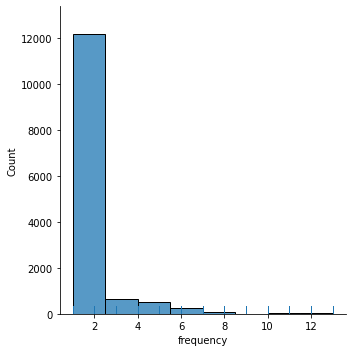

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

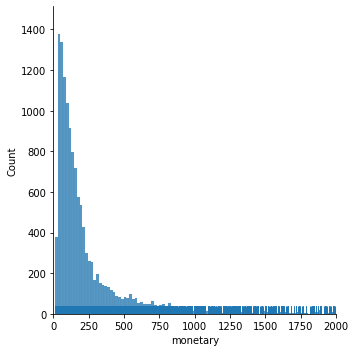

<Figure size 576x360 with 0 Axes>

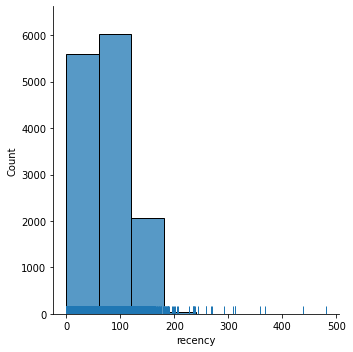

In [67]:
# Plotting a few exploratory graphs for rfm

# Customers who order 1 time and 2 times are predominant. There fewer customers are the ones that have ordered more than 5 times.
plt.figure(figsize=(8, 5))
sns.displot(df['frequency'], bins=8, kde=False, rug=True)
plt.figure()

# The ammount customers spend is frequently less than 300$.
plt.figure(figsize=(8, 5))
sns.displot(df['monetary'], kde=False, rug=True)
plt.xlim(0, 2000)

# Customers who had come within the last 2 months are the majority and there are some customers that have not ordered for more than a year.
plt.figure(figsize=(8, 5))
sns.displot(df['recency'], bins=8, kde=False, rug=True)

As next  step we proceed with standardizing the features.
This is important because clustering techniques use a distance metric to measure similarities between observations and form clusters . So, features with high ranges will have a bigger influence on the clustering. Therefore, standardization is required before building a clustering model.

In [68]:
# Standardizing the features
scaler = StandardScaler()
rfm_std = scaler.fit_transform(rfm)

We now go ahead with our first segmentation .
Our choice was to divide the customers in 3 differnt segments according to their scores.
We first created a new column called customer category that contains the weighted average of the 3 scores for each customer; than we designed a simple for loop to achieve this goal  

In [69]:
# Segmenting the custumer in Gold, Silver and Bronze according to their scores in frequency, recency and monetary value
# and keeping in mind that we assinged to recency a lower weight since in our opinion is a less impotant factor to determine future customer behavior.
df['customer_category'] = ((df['monetary_score']*2) +
                           (df['frequency_score']*2) + (df['recency_score']*1)) / 5

for i in df.index:

    if (df['customer_category'][i] >= 4) and (df['customer_category'][i] <= 5):
        df['customer_category'][i] = 'Gold'
    elif (df['customer_category'][i] > 2) and (df['customer_category'][i] < 4):
        df['customer_category'][i] = 'Silver'
    elif (df['customer_category'][i] >= 1) and (df['customer_category'][i] <= 2):
        df['customer_category'][i] = 'Bronze'


To visualize this first segmentation we plotted the results using a pie chart, to do so we first  created a simple function that generates labels.
From the plot and the legend we can see that only the 3.7% of our customers are classified in the gold segment.


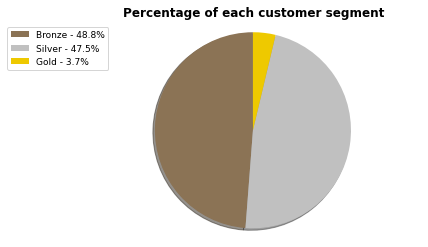

In [70]:
def generate_legend_labels(chart_data, chart_labels):
    total_values = sum(chart_data.values)

    for key, value in chart_data.items():
        value_percentage = value / total_values * 100
        rounded_value_percentage = round(value_percentage, 1)
        chart_labels.append(key + ' - ' + str(rounded_value_percentage) + '%')

# Plotting the percentege of bronze, silver and gold customers
colors = ['#8B7355', '#C0C0C0', '#EEC900']
customer_category = df.groupby(['customer_category']).count().sort_values(
    by=['customer_id'], ascending=False)['customer_id']

customer_category_labels = []
customer_category_sizes = customer_category.values
generate_legend_labels(customer_category, customer_category_labels)

# Generates the pie chart
customer_category_chart, customer_category_ax = plt.subplots()
customer_category_ax.pie(customer_category_sizes,
                         shadow=True, startangle=90, colors=colors)
customer_category_ax.axis('equal')

plt.legend(labels=customer_category_labels, loc='upper left',
           bbox_to_anchor=(-0.25, 1.), fontsize=9)
customer_category_ax.set_title(
    'Percentage of each customer segment', fontweight='bold')
plt.show()           


# **IMPLEMENTING THE MODELS** 

To be more precise with our clustering analysis we implemented three different clustering algorithms: k-means, hierarchical clustering and DBSCAN.
We started with the implementation of kmeans , using the elbow method to find out the optimal number of clusters .
From the output we saw that we could decide between 3 or 4 clusters , but we opted for 3 in order to stay consisent with the rfm segmentation.

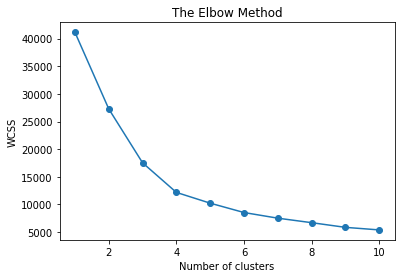

In [71]:
# K means clustering

# Importing libraries for K-means algorithm and performance measurments

# Using elbow method to find out optimal k value with WCSS score
# Creating empty list to insert values
WCSS = []

# Using a for function to fill the list with the WCSS scores
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_std)
    WCSS.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure()
plt.plot(range(1, 11), WCSS, marker='o', label='line with marker')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Since we chose 3  clusters we proceede with the fitting of the model using the standardized data frame because as already mentioned clustering algorithms are very sensible to not standardized features.
From the visualization we can distinguish clearly the 3 clusters and their centroids. 

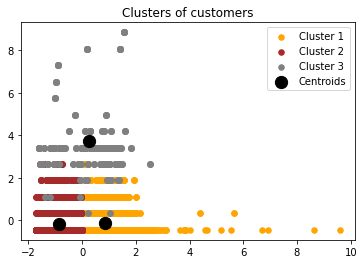

In [72]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
# Use fit_predict to cluster the dataset
km_clusters = kmeans.fit_predict(rfm_std)

rfm_std_cl = pd.DataFrame(rfm_std, columns=rfm.columns, index=rfm.index)
rfm_std_cl['cluster'] = km_clusters

# Visualising the clusters (3 clusters according to the Elbow method)
plt.scatter(rfm_std[km_clusters == 0, 0], rfm_std[km_clusters ==
            0, 1], s=30, c='orange', label='Cluster 1')
plt.scatter(rfm_std[km_clusters == 1, 0], rfm_std[km_clusters ==
            1, 1], s=30, c='brown', label='Cluster 2')
plt.scatter(rfm_std[km_clusters == 2, 0], rfm_std[km_clusters ==
            2, 1], s=30, c='gray', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=150, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()


To verify the efficency and confront  our models we chose to compute the following evaluation metrics :
-silhouette score
-calinski harabasz score
-davies_bouldin_score

In [73]:
# Calculating cluster validation metrics (silhouette score, calinski harabasz score, davies bouldin score)
score_kemans_s = silhouette_score(rfm_std, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(rfm_std, kmeans.labels_)
score_kemans_d = davies_bouldin_score(rfm_std, km_clusters)
print('Silhouette Score: %.3f' % score_kemans_s)
print('Calinski Harabasz Score: %.3f' % score_kemans_c)
print('Davies Bouldin Score: %.3f' % score_kemans_d)

Silhouette Score: 0.475
Calinski Harabasz Score: 9224.910
Davies Bouldin Score: 0.787


The second model we implemented is Hierarchical clustering, once again to find the optimal number of clusters we plotted the dendogram and by observing the figure we deduced that the right number of clusters is 4

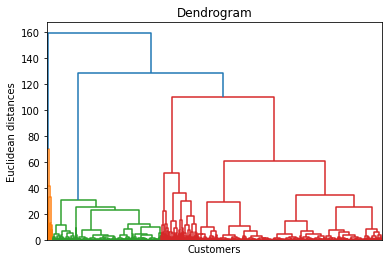

In [74]:
# Hierarchical clustering

# Plotting the dendrogram to find the optimal number of clusters
plt.figure()
dendrogram = sch.dendrogram(sch.linkage(rfm_std, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks([])
plt.show()

Once again we perform the fitting for this model always using the standardized data.
And we plot the results of our clustering

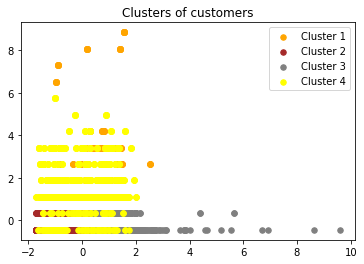

In [75]:
# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(
    n_clusters=4, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(rfm_std)

# Visualising the clusters (4 clusters according to the Dendogram)
plt.figure()
plt.scatter(rfm_std[hc_clusters == 0, 0], rfm_std[hc_clusters == 0, 1], s = 30, c = 'orange', label = 'Cluster 1')
plt.scatter(rfm_std[hc_clusters == 1, 0], rfm_std[hc_clusters == 1, 1], s = 30, c = 'brown', label = 'Cluster 2')
plt.scatter(rfm_std[hc_clusters == 2, 0], rfm_std[hc_clusters == 2, 1], s = 30, c = 'gray', label = 'Cluster 3')
plt.scatter(rfm_std[hc_clusters == 3, 0], rfm_std[hc_clusters == 3, 1], s = 30, c = 'yellow', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.legend()
plt.show()

Also for the hierarchical clustering we compute the same 3 evaluation metrics 

In [76]:
# Calculating cluster validation metrics
score_AGclustering_s = silhouette_score(
    rfm_std, hc.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(rfm_std, hc.labels_,)
score_AGclustering_d = davies_bouldin_score(rfm_std, hc_clusters)
print('Silhouette Score: %.3f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.3f' % score_AGclustering_c)
print('Davies Bouldin Score: %.3f' % score_AGclustering_d)

Silhouette Score: 0.465
Calinski Harabasz Score: 8793.187
Davies Bouldin Score: 0.918


The last model implemented is DBSCAN. It is different from Kmeans and Hirarchical , because it's density based . In fact DBSCAN will figure out alone the number of clusters , but it needs some important hyperparameters to work (like the epsilon) that are  less intuitive to find compared to the number of clusters parameter for K-Means or HC, so it’s more difficult to choose good initial parameter values for this algorithm.
 In simple explanation DBSCAN works by determining whether the minimum number of points are close enough to one another to be considered part of a single cluster.
As just anticipated this model's behaviour is dictated by several parameters:
-epsilon-->Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
-min sample--> The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.

After tuning the hyparameters we get that the min sample is 6 ,while by looking at the graph the epsilon is 0,4

6


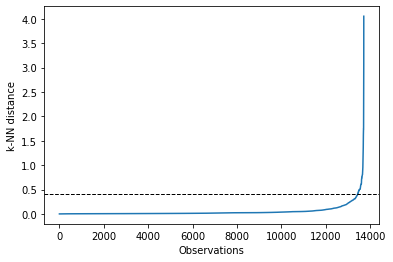

In [77]:


# DBSCAN clustering

# Since the DBSCAN code runs only with dataframes, first, we transformed the standardized array to a DataFrame
rfm_std_df = pd.DataFrame(rfm_std, columns=rfm.columns)


# Tuning the hyperparameters

# Finding the 'n'
min_sample = 2*len(rfm_std_df.columns)
print(min_sample)  # equal to 6

# Finding the epsilon
# n = 7 because the first column will be of zeros
nbrs = NearestNeighbors(n_neighbors=7).fit(rfm_std_df)
# finding the k neighbors to each point
neigh_dist, neigh_ind = nbrs.kneighbors(rfm_std_df)
sort_neigh_dist = np.sort(neigh_dist, axis=0)  # sorting in ascending order

# Plotting the graph to visualize which is the optimal epsilon value
k_dist = sort_neigh_dist[:, 6]
plt.plot(k_dist)
# 0.4 chosen as it crosses the middle of the curve in the graph = optimal epsilon
plt.axhline(y=0.4, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Observations")
plt.show()

As for the previous models we perform the fitting and print the visualization to find the clusters 

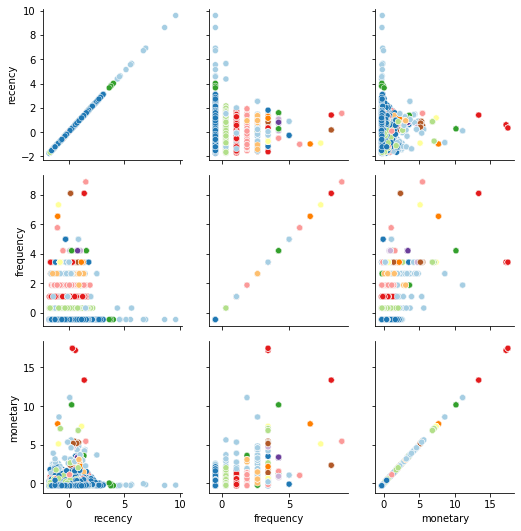

In [78]:
# Fitting the model
dbscan_model = DBSCAN(eps=0.4, min_samples=6).fit(rfm_std_df)
labels = dbscan_model.labels_
rfm_std_df["LABEL"] = labels
rfm_std_df.head(10)

# Plotting the graph to find the clusters
g = sns.PairGrid(rfm_std_df, hue='LABEL', palette="Paired")
g = g.map(sns.scatterplot)
print(g)

Lastly we computed the evaluation metrics also for this model .
Confronting these output with the previous ones we came to the conclusion that K_means is our best model.

In [79]:
# Fitting model and predicting clusters
dbscan_clusters = dbscan_model.fit_predict(rfm_std_df)

# Calculating cluster validation metrics
score_dbsacn_s = silhouette_score(
    rfm_std_df, dbscan_clusters, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(rfm_std_df, dbscan_clusters)
score_dbsacn_d = davies_bouldin_score(rfm_std_df, dbscan_clusters)
print('Silhouette Score: %.3f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.3f' % score_dbsacn_c)
print('Davies Bouldin Score: %.3f' % score_dbsacn_d)

Silhouette Score: 0.379
Calinski Harabasz Score: 7974.005
Davies Bouldin Score: 0.256


Since kmeans is our best model we moved on to interpreting it's clusters .
From the plots we obtain we can see some trends of the three different clusters. Cluster 0 are considered new customers because they have an high recency but still low frequency and monetary value. Cluster 1 refers to the at risk clients because they a very low recency and low frequency and low monetary value. Cluster 2 are the loyal customers, they have moderate recency, high frequency and very high monetary value.

Size of each cluster: 
1    6627
0    6541
2     545
Name: cluster, dtype: int64


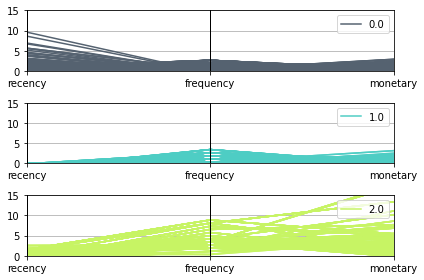

In [80]:
# Considering the validation metrics, K-means was our best model

# Interpreting the clusters in K-means
print('Size of each cluster: ')
print(rfm_std_cl['cluster'].value_counts())

# Separating clusters in different dataframes
cluster0 = pd.DataFrame()
cluster1 = pd.DataFrame()
cluster2 = pd.DataFrame()

for i in rfm_std_cl.index:
    if rfm_std_cl['cluster'][i] == 0:
        cluster0 = cluster0.append(rfm_std_cl.iloc[i])
    elif rfm_std_cl['cluster'][i] == 1:
        cluster1 = cluster1.append(rfm_std_cl.iloc[i])
    elif rfm_std_cl['cluster'][i] == 2:
        cluster2 = cluster2.append(rfm_std_cl.iloc[i])



 #Plotting the clusters in relation to other variables

# 'New' customers = high recency, low frequency or monetary
plt.figure()
plt.subplot(311)
parallel_coordinates(cluster0, 'cluster', color=('#556270'))
plt.ylim(0, 15)
# 'Lost' customers = moderate frequency and monetary, low recency
plt.subplot(312)
parallel_coordinates(cluster1, 'cluster', color=('#4ECDC4'))
plt.ylim(0, 15)
# 'Loyal' customers = high monetary value, above average frequency, moderate recency
plt.subplot(313)
parallel_coordinates(cluster2, 'cluster', color=('#C7F464'))
plt.ylim(0, 15)
plt.tight_layout()        